<a href="https://colab.research.google.com/github/balas05/ML-minor-projects/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import matplotlib.pyplot as plt
 import pandas as pd

In [3]:
df = pd.read_csv("Position_Salaries.csv")

In [8]:
x =  df.iloc[:,1:-1].values
y = df.iloc[:,-1].values


In [5]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [18]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# FEATURE **SCALING** ***

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(x)
Y= sc_y.fit_transform(y)


In [21]:
print(X)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [22]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# SVR MODEL

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel ='rbf' )#radial basis function kerenel used for SVR
regressor.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [27]:
 sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

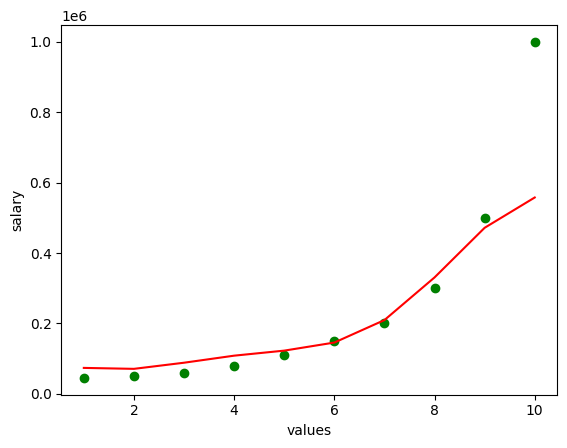

In [31]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color = 'green')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color ='red')
plt.xlabel('values')
plt.ylabel('salary')
plt.show()